<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/Scraping/1_HTTP_Inicial/web_scraping_http_inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" data-canonical-src="https://colab.research.google.com/assets/colab-badge.svg"></a>

# **Web Scraping: Extrayendo datos de Internet**

## **¬øQu√© es el web scraping?**  ü§î

*La pr√°ctica de **recopilar datos** a trav√©s de cualquier medio que no sea un programa que interact√∫a con una API o un humano que usa un navegador web. **Normalmente mediante un programa automatizado** que consulta un servidor web, solicita datos (generalmente en forma de HTML y otros archivos que componen las p√°ginas web) y luego analiza esos datos para extraer la informaci√≥n necesaria.*

<br>

<center>
<img src="https://images-na.ssl-images-amazon.com/images/I/517z2NUzcEL._SX198_BO1,204,203,200_QL40_ML2_.jpg">
</center>

<br>

*Por otro lado, el **web crawling o indexaci√≥n** se utiliza para indexar la informaci√≥n de la p√°gina mediante bots tambi√©n conocidos como crawlers (lo que hacen los motores de b√∫squeda). Se trata de ver una p√°gina como un todo e indexarla. Cuando un bot rastrea un sitio web, **recorre todas las p√°ginas y todos los enlaces**, hasta la √∫ltima l√≠nea del sitio web, en busca de **CUALQUIER informaci√≥n**.*

## **Antes de empezar** ‚ö†Ô∏è

1. *Aspectos √©ticos y legales del web scraping*
  * El web scraping es una forma autom√°tica de guardar informaci√≥n que se presenta en nuestro navegador muy utilizada tanto en la industria como en la academia, sus aspectos legales depender√°n de cada sitio y de cada estado. Respecto a la √©tica es importante que nos detengamos a pensar si estamos o no generando algun perjuicio. En ambos casos el debate est√° abierto y hay mucha bibliograf√≠a al respecto como por ejemplo [este trabajo](https://www.researchgate.net/profile/Vlad-Krotov/publication/324907302_Legality_and_Ethics_of_Web_Scraping/links/5aea622345851588dd8287dc/Legality-and-Ethics-of-Web-Scraping.pdf)

2. *No reinventar la rueda*
  * Emprender un proyecto de web scraping a veces es rapido y sencillo, pero normalmente requiere tiempo y esfuerzo. Siempre es aconsejable asegurarse de que valga la pena y antes iniciar hacerse algunas preguntas:<br>
    - ¬øLa informacion que necesito ya se encuentra disponible? (ej: APIs)
    - ¬øVale la pena automatizarlo o es algo que lleva poco trabajo a mano?





## **Conceptos b√°sicos sobre la web**

#### HTML, CSS y JavaScript son los tres lenguajes principales con los que est√° hecho la parte de la web que vemos (*front-end*).

<center>
<img src="https://www.nicepng.com/png/detail/142-1423886_html5-css3-js-html-css-javascript.png" width="400">

<img src="https://geekflare.com/wp-content/uploads/2019/12/css-gif.gif" width="243">


</center>

<br>
<br>

| ESTRUCTURA  | ESTILO | FUNCIONALIDAD|
|-----|----------------| ---------- |
|HTML| CSS | JAVASCRIPT|

<font color="gray">
Fuente de las im√°genes: <br>
https://geekflare.com/es/css-formatting-optimization-tools/ <br>
https://www.nicepng.com/ourpic/u2q8i1o0e6q8r5t4_html5-css3-js-html-css-javascript/
</font>



## Introducci√≥n a HTML

El lenguaje principal de la internet es HTML, cuando nosotros vemos algo as√≠:

![](https://github.com/institutohumai/cursos-python/blob/master/Scraping/1_HTTP_Inicial/multimedia/hello-world.jpeg?raw=1)

Eso se genera a partir de una c√≥digo que luce as√≠

```html
<html>
  <header>
    <title>Web Scraping - Instituto Humai</title>
  </header>
  <body>
    <h1>¬°Hola!</h1>
    <p>Esto es un sitio web</p>
  </body>
</html>
```

**_Nota_**: Para saber m√°s sobre HTML pod√©s consultar [ac√°](https://www.w3schools.com/TAGS/default.ASP) la lista de etiquetas de este lenguaje.


```html
  <head>
    <title>Mi primer pagina</title>
  </head>
  <body>
    <h1 id='titulo'>Hola</h1>
    <h2 style='color:red;'>Subtitulo en rojo</h2>
    <p>Primer parrafo</p>
    <hr>
    <img src="https://i.pinimg.com/564x/8f/14/25/8f142555ef5006abd82d8c5c7f9f8570.jpg" alt="gato" width=400>
  </body>
```
<center>
<img src="https://i.ibb.co/9pqvGSv/HTML-gatito.png"  width=800> <br>
<h3>Probar el c√≥digo: <a>https://codepen.io/GEJ1/pen/GRmVNPb</a></h3>
</center>


## DOM (Document Object Model)


Interfaz independiente del lenguaje que trata un documento XML o HTML como una estructura de tipo **√°rbol**
<figure>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/DOM-model.svg/330px-DOM-model.svg.png" width="500">

```html
<html>
  <head>
    <title>My title</title>
  </head>
  <body>
    <h1>A heading</h1>
    <a href>Link text</a>
  </body>
</html>
```
</figure>

<font color="gray"> Fuente: https://en.wikipedia.org/wiki/Document_Object_Model
<br>Autor: Birger Eriksson
</font>


## ¬øC√≥mo consigo el c√≥digo HTML?

Ahora que sabemos cu√°l es el componente principal de los sitios webs podemos intentar programar a nuestra computadora para leer HTML y extraer informaci√≥n √∫til.

Para conseguir el c√≥digo de un sitio web podemos presionar `ctrl+u` en el navegador.

Para hacer lo mismo desde Python podemos hacer lo siguiente:

In [1]:
#Importamos la libreria necesaria
import requests

un_sitio_web = "https://es.wikipedia.org/wiki/HTML"

# esto descarga la informaci√≥n del sitio web
# Es similar a lo que hace un navegador web antes de mostrar el contenido de forma amigable para un humano
resultado = requests.get(un_sitio_web)

# accedemos al c√≥digo a trav√©s del atributo "text" del resultado
codigo_html = resultado.text
print(codigo_html[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="es" dir="ltr">
<head>
<meta charset="UTF-8">
<title>HTML - Wikipedia, la enciclopedia libre</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match(/(?:^|; )eswik

### ¬øQu√© acabamos de hacer?

Veamos algunos detalles m√°s sobre c√≥mo descargar el contenido de un sitio web (O c√≥mo se le suele decir en la jerga de la programaci√≥n _realizar un request_). Como dijimos, en python se puede utilizar la funci√≥n get de la libreria requests para hacer esto, veamos con mayor profundidad c√≥mo se utiliza.

In [2]:
# httpbin es una pagina para testear pedidos HTTP, en particular la siguiente URL nos devuelve nuestro header.
url = 'http://httpbin.org/headers'
resp = requests.get(url)

print('------------------------------')
print('Respuesta sin headers')
print(resp.text)

print('------------------------------')
print('Respuesta con headers')
nuestros_headers = {
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'
    }
resp_con_headers = requests.get(url, headers = nuestros_headers)
print(resp_con_headers.text)


------------------------------
Respuesta sin headers
{
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.27.1", 
    "X-Amzn-Trace-Id": "Root=1-64921f19-65fdfd5e492172a22cb3116a"
  }
}

------------------------------
Respuesta con headers
{
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36", 
    "X-Amzn-Trace-Id": "Root=1-64921f19-12da8c2f4d210e631bf2a970"
  }
}



A parte de la _url_, muchas veces se especifican los _headers_, estos son objetos que proveen datos sobre nuestro _request_, por ejemplo en el campo user-agent brindamos detalles sobre quienes somos (Nuestro sistema operativo, navegador web y dem√°s). En este caso, como no estamos usando un navegador sino que hacemos el _request_ desde Python normalmente se omite este campo, o en caso de ser obligatorio se puede inventar, ya que algunos sitios nos van a ignorar a menos que especifiquemos este campo.

Pueden ver m√°s en esta [Lista de Headers](https://en.wikipedia.org/wiki/List_of_HTTP_header_fields)

- Consultas
    - ¬øPor qu√© los sitios te podr√≠an bloquear/ignorar?
    - ¬øDe donde saco un user-agent?


### Protocolo HTTP

La web utiliza ampliamente el protocolo HTTP (de _Hypertext Transfer Protocol_) para interactuar con sus recursos. Este protocolo indica c√≥mo estructurar un mensaje de texto que describa la petici√≥n (**request**) del usuario a un servidor. Hay distintos tipos de peticios que un usuario puede realizar, algunas de ellas son:

* **GET**: Solicita una representaci√≥n de un recurso alojado en el servidor.
* **POST**: Env√≠a datos al servidor para crear un recurso nuevo.
* **PUT**: Crea o modifica un recurso del servidor.
* **DELETE**: Elimina un recurso del servidor.

Existen otros m√©todos que no nos van a ser relevantes por ahora.

Cada vez que vamos al navegador y escribimos la direcci√≥n de una p√°gina web, **estamos haciendo un GET request** a un servidor.
Esto es una petici√≥n para adquirir el c√≥digo de un recurso que queremos visualizar en el navegador.

Como vimos antes la funci√≥n `get` retorna un objeto, el cual llamamos _resp_, este es un elemento de la clase **_Response_** y tiene distintos atributos a los que podemos acceder.

El objeto **_Response_** de requests tiene los siguientes elementos principales:

- **.text**: devuelve el contenido como string.
- **.content**: devuelve el contenido en bytes.
- **.json()**: el contenido en formato JSON, si es posible.
- **.status_code**: el c√≥digo de respuesta.


El c√≥digo de status (*status code*) nos informa del estado de nuestra *request*

C√≥digos posibles:

- 1xx Mensaje de informaci√≥n
- 2xx √âxito
- 3xx Redirigir a otra URL
- 4xx Error del cliente
- 5xx Error del servidor

<center>
<img alt="http-status-codes" src="https://miro.medium.com/max/1400/1*w_iicbG7L3xEQTArjHUS6g.jpeg" width="500"> <br>
<font color='gray'>Fuente: https://www.youtube.com/watch?v=LtNSd_4txVc
</font>
</center>



In [3]:
#Vemos el c√≥digo de estado
# 200 es que esta todo bien, 5xx o 4xx es que esta todo mal (Por ejemplo el clasico 404)
resp.status_code

200

In [4]:
#Vemos los headers que enviamos
resp.request.headers

{'User-Agent': 'python-requests/2.27.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

El atributo que nos interesa particularmente es resp.text, que guardan el contenido de la p√°gina.

Como vamos a descargar el codigo de un sitio frecuentemente armamos una funcion para no reescribir lo mismo muchas veces

In [5]:
def codigo_html(url):
    headers = {
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'
        }
    resp = requests.get(url, headers = headers)
    return resp.text

In [32]:
# Tambien podemos scrapear otro tipo de a que no sea texto
import requests

# defino la URL
image_url = 'https://ihum.ai/static/logos/cursos-index.png'

# Hago una peticion y guardo la respuesta
image_response = requests.get(image_url)

# Accedemos al contenido de la imagen en bytes
image_response_content = image_response.content

print(f'Este es el contenido en bytes: \n {image_response_content[:100]}')

Este es el contenido en bytes: 
 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01%\x00\x00\x01\x9d\x08\x06\x00\x00\x00T\xfeeo\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00'


Esta imagen la bajamos de internet usando Python! 
 


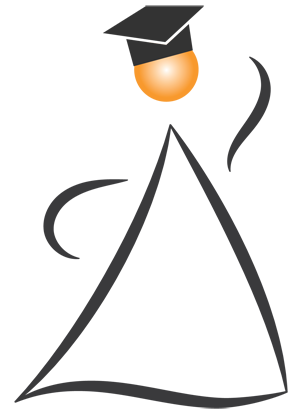

In [33]:
# Importamos librerias para manejar imagenes (no tienen nada que ver con el scrapeo)
from PIL import Image
from io import BytesIO

# Mostramos la imagen
image_from_url = Image.open(BytesIO(image_response_content))
print('Esta imagen la bajamos de internet usando Python! \n ')
image_from_url

### Documentaci√≥n
La funci√≥n get y la clase Response fueron desarrolladas por lxs programadores que crearon la librer√≠a requests. Si quieren saber mas sobre alg√∫n detalle siempre es recomendable buscar en la [documentaci√≥n oficial de la librer√≠a](https://docs.python-requests.org/en/latest/).

## ¬øC√≥mo extraigo datos √∫tiles del c√≥digo HTML?

- Veamos un ejemplo inspeccionando con chrome un sitio web:
1. Nos posicionamos sobre el elemento que nos interesa.
2. Presionamos click derecho -> *inspeccionar elemento* para abrir las *herramientas de desarrollo* (o presionando `CTRL + SHIFT + I`)
4. Esto nos da acceso al codigo de HTML correspondiente al elemento de la pagina que nos interesa.


<img src="https://i.ibb.co/1RSNcs5/inspect.png" alt="inspect" width="1100">

<hr>
<br>
<br>

En **Elements** vamos a poder inspeccionar el c√≥digo HTML, para ubicar los datos de nuestro inter√©s. Para identificar la ubicaci√≥n de uno, podemos posicionarnos con el cursor sobre el sitio, hacer click derecho, y seleccionar "Inspeccionar elemento".

En la solapa **Network** podemos ver todos los paquetes HTTP que realiza nuestro navegador interactuando con un sitio. Identificando los paquetes de las APIs que traen los datos, podemos _scrapear_ datos m√°s facilmente. **[Esto lo ver√°n en la clase de APIs]**

<br>
<br>

<img src='https://i2.wp.com/abodeqa.com/wp-content/uploads/2019/02/Inspect-Element-Using-Select-Tool.gif'>



### **M√©todo 1: Expresiones regulares**

RegEx para los amigos. Son un mini lenguaje de programaci√≥n dise√±ado para realizar b√∫squedas en strings.

Las funciones principales de la librer√≠a re son:
- re.findall(pattern, string) para encontrar todos los resultados de una b√∫squeda
- re.search(pattern, string) para encontrar el primer resultado que coincida
- re.sub(pattern, replace, string) para substituir un texto por otro

Recursos √∫tiles

- [Testeo de regex online](https://regex101.com/)
- [CheatSheet](https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf)

#### Aplicandolo a la web
##### Ejemplo 1: Usamos regex para extraer los t√≠tulos del diario La Prensa.


```html
<h2 class="entry__title"><a href="http://www.laprensa.com.ar/491843-Dilemas-de-la-batalla-cultural-I.note.aspx" target="_self" onclick="javascript:if(typeof(_gaq)!='undefined'){_gaq.push(['_trackEvent', 'Notas', 'Cultura', 'Dilemas de la batalla cultural (I)'])};">Dilemas de la batalla cultural (I)</a></h2>
```


In [71]:
#Usamos el navegador para identificar la estructura de los datos que queremos extraer y creamos el patr√≥n de b√∫squeda
regla_de_busqueda = r'_self">(.+)</a></h2>'

In [72]:
#Usamos findall para encontrar todas las coincidencias
import re
import requests
titles = [m for m in re.findall(regla_de_busqueda, codigo_html("http://www.laprensa.com.ar/"))]

In [44]:
print(titles)

['Morales: "Hago responsables a Alberto Fern√°ndez y a Cristina Kirchner de la extrema violencia en Jujuy"', 'Hallan restos √≥seos triturados y un dije durante el rastrillaje en el r√≠o Tragadero cerca de la chancher√≠a de los Sena', 'Emerenciano Sena pidi√≥ declarar "para decir su verdad" y dijo ser inocente', 'L√≠deres', 'El escudo de San Luis y Juan Manuel de Rosas', 'El Club Evaristo (Parte XVII): el caso de Juan Duarte', 'Las canciones patrias en la voz de Abel Pintos', '\u200bM√°s de 2,2 millones de personas se movilizaron en el fin de semana largo impulsados por el Previaje', '"Sin cuerpo, puede haber condena por femicidio", dijo una de las fiscales del caso Cecilia ', 'El escudo de San Luis y Juan Manuel de Rosas', '‚ÄúLa Argentina est√° aislada del mundo‚Äù', 'Bradley Beal se muda a Phoenix tras un traspaso que env√≠a a Chris Paul a Washington', 'Los Nuggets hacen historia: campeones de la NBA por primera vez', 'Nikola Jokic, el MVP de las finales', 'Denver se lleva otra victo

####  <font color='red'> Ejercicio </font>

####  Modifiquen la regla de b√∫squeda para que descargue los links a las notas en vez del t√≠tulo

In [96]:
# Resoluci√≥n

#Usamos el navegador para identificar la estructura de los datos que queremos extraer y creamos el patr√≥n de b√∫squeda
regla_de_busqueda = r'<a href="(.+)" .+ target="_self">'

links = [link for link in re.findall(regla_de_busqueda, codigo_html("http://www.laprensa.com.ar/"))]
print(links)


['https://www.laprensa.com.ar/531176-Morales-Hago-responsables-a-Alberto-Fernandez-y-a-Cristina-Kirchner-de-la-extrema-violencia-en-Jujuy.note.aspx', 'https://www.laprensa.com.ar/531176-Morales-Hago-responsables-a-Alberto-Fernandez-y-a-Cristina-Kirchner-de-la-extrema-violencia-en-Jujuy.note.aspx', 'https://www.laprensa.com.ar/531186-Hallan-restos-oseos-triturados-y-un-dije-durante-el-rastrillaje-en-el-rio-Tragadero-cerca-de-la-chancheria-de-los-Sena.note.aspx" class="thumb-url', 'https://www.laprensa.com.ar/531186-Hallan-restos-oseos-triturados-y-un-dije-durante-el-rastrillaje-en-el-rio-Tragadero-cerca-de-la-chancheria-de-los-Sena.note.aspx', 'https://www.laprensa.com.ar/531183-Emerenciano-Sena-pidio-declarar-para-decir-su-verdad-y-dijo-ser-inocente.note.aspx" class="thumb-url', 'https://www.laprensa.com.ar/531183-Emerenciano-Sena-pidio-declarar-para-decir-su-verdad-y-dijo-ser-inocente.note.aspx', 'https://www.laprensa.com.ar/531197-Lideres.note.aspx" class="mainlink', 'https://www.lap

### **M√©todo 2: BeautifulSoup**
* Esta librer√≠a provee un *parser* de html, o sea un programa que entiende el c√≥digo, permitiendonos hacer consultas m√°s sofisticadas de forma simple, por ejemplo "buscame todos los titulos h2 del sitio".


* Se usa para extraer los datos de archivos HTML. Crea un √°rbol de an√°lisis a partir del c√≥digo fuente de la p√°gina que se puede utilizar para extraer datos de forma jer√°rquica y m√°s legible.

<center>
<img alt="" width="700" role="presentation" src="https://miro.medium.com/max/700/0*ETFzXPCNHkPpqNv_.png"> <br>

<font color="gray">
Fuente: https://medium.com/milooproject/python-simple-crawling-using-beautifulsoup-8247657c2de5
<font>
</center>

## Generalidades

In [12]:
from bs4 import BeautifulSoup
from IPython.display import HTML
import requests

# Vamos a jugar un poco con la pagina de Exactas
url_base = 'https://exactas.uba.ar/'
endpoint_calendario = 'calendario-academico/'
html_obtenido = requests.get(url_base + endpoint_calendario)
soup = BeautifulSoup(html_obtenido.text, "html.parser")
# print(soup)
# print(type(soup))
# print(soup.prettify())

## Tambien podemos mostrar renderizar el html aca en Colab :D
# HTML(html_obtenido.text)

In [13]:
# Si queremos quedarnos con un tag

# El m√©todo "find" busca el primer elemento de la pagina con ese tag
primer_h3 = soup.find('h3')
print(primer_h3)

# equivalente a:
# print(soup.h3.text)

<h3>INSCRIPCI√ìN PRIMER CUATRIMESTRE 2023</h3>


In [14]:
# El m√©todo "find_all" busca TODOS los elementos de la pagina con ese tag y devuelve una lista que los contiene (en realidad devuelve un objeto de la clase "bs4.element.ResultSet")
h3_todos = soup.find_all('h3')
print(h3_todos)

# Si usamos el parametro limit = 1, emulamos al metodo find:
# h3_uno_solo = soup.find_all('h3',limit=1)
# print(h3_uno_solo)

[<h3>INSCRIPCI√ìN PRIMER CUATRIMESTRE 2023</h3>, <h3>EX√ÅMENES DE FEBRERO-MARZO 2023</h3>, <h3>PRIMER BIMESTRE 2023 (8 semanas)</h3>, <h3>SEGUNDO BIMESTRE 2023 (8 semanas)</h3>, <h3>INSCRIPCI√ìN SEGUNDO CUATRIMESTRE 2023</h3>, <h3>INSCRIPCI√ìN A DOCTORADO 2023</h3>, <h3>SEMANAS DE LAS CIENCIAS 2023</h3>, <h3>ACTOS DE COLACI√ìN DE GRADO Y POSGRADO 2023</h3>, <h3><strong>FERIADOS</strong></h3>, <h3 class="widget-title"><a href="https://exactas.uba.ar/agenda/">Agenda ‚Üí</a></h3>]


In [15]:
# podemos iterar sobre el objeto
for fecha in h3_todos[:-1]:
  # Extraemos el texto que se encuentra dentro del tag
  print(fecha.text)

INSCRIPCI√ìN PRIMER CUATRIMESTRE 2023
EX√ÅMENES DE FEBRERO-MARZO 2023
PRIMER BIMESTRE 2023 (8 semanas)
SEGUNDO BIMESTRE 2023 (8 semanas)
INSCRIPCI√ìN SEGUNDO CUATRIMESTRE 2023
INSCRIPCI√ìN A DOCTORADO 2023
SEMANAS DE LAS CIENCIAS 2023
ACTOS DE COLACI√ìN DE GRADO Y POSGRADO 2023
FERIADOS


In [16]:
# Busco por clase, escribo class_ porque "class" es una palabra reservada en Python
eventos_proximos = soup.find('aside', class_ = 'widget_my_calendar_upcoming_widget')
for evento in eventos_proximos:
  print(evento.text)

Agenda ‚Üí

21 junio, 2023,  : Finaliza Inscripci√≥n a la Semana de la Biolog√≠a  | + INFO
21 junio, 2023,  : Semana de la F√≠sica  | + INFO
23 junio, 2023,  : Finaliza la Semana de la F√≠sica  | + INFO
23 junio, 2023, 13.00: Coloquios DCAO/CIMA, con Anna S√∂rensson  | + INFO
26 junio, 2023,  : Comienza la Jornada de Reciclaje de Aparatos El√©ctricos y Electr√≥nicos (RAEE)  | + INFO
27 junio, 2023, 14.00: Charla de la Lic. en Ciencias de Datos  | + INFO



In [17]:
# Todos los links. Esto podr√≠a ser √∫til para seguir scrapeando todo el sitio haciendo requests en ellos
a_todos = soup.find_all('a', href=True)
for a in a_todos:
  print(f"{a.text}: {a['href']}")

Conoc√© Exactas: https://exactas.uba.ar/institucional/la-facultad/
Carreras de Grado: https://exactas.uba.ar/ensenanza/carreras-de-grado/
Carreras de Posgrado: https://exactas.uba.ar/ensenanza/carreras-de-posgrado/
Cursos de Posgrado: https://exactas.uba.ar/ensenanza/cursos-de-posgrado/
Estudiantes Internacionales: https://exactas.uba.ar/informacion-para-estudiantes-internacionales/
Orientaci√≥n Vocacional: https://exactas.uba.ar/extension/ov/
Becas para estudio: https://exactas.uba.ar/becas-para-estudio/
Carreras de Grado: https://exactas.uba.ar/ensenanza/carreras-de-grado/
Calendario Acad√©mico: https://exactas.uba.ar/calendario-academico/
Inscripci√≥n de ingresantes: https://exactas.uba.ar/inscripcion-ingresantes/
Inscripci√≥n a materias: http://inscripciones.exactas.uba.ar/exactas/
Programa de Ingresantes: https://exactas.uba.ar/cbc/
Becas para estudio: https://exactas.uba.ar/becas-para-estudio/
Becas de Investigaci√≥n: https://exactas.uba.ar/becas-de-investigacion/
Distribuci√≥n d

In [18]:
# Podemos tambien scrapear un tabla y traernos los feriados
tabla_feriados = soup.find_all('td')

# Con 'attr' podemos acceder a cualquier atributo de a etiqueta usando un diccionario
dias = soup.find_all('td', attrs={'style':"width: 14.8064%; height: 56px;"})
fechas = soup.find_all('td', attrs={'style':"width: 48.6333%; height: 56px;"})
eventos = soup.find_all('td', attrs={'style':"width: 26.6515%; height: 56px;"})
# print(tabla_feriados)

for pos in range(len(dias)):
  print(f" Dia: {dias[pos].text.strip():<20} | fecha: {fechas[pos].text.strip():<62} | evento: {eventos[pos].text.strip():<20} ")

 Dia: 1 de enero           | fecha: A√±o Nuevo                                                      | evento: Inamovible           
 Dia: 20 de febrero        | fecha: Carnaval                                                       | evento: Inamovible           
 Dia: 21 de febrero        | fecha: Carnaval                                                       | evento: Inamovible           
 Dia: 24 de marzo          | fecha: D√≠a Nacional de la Memoria por la Verdad y la Justicia         | evento: Inamovible           
 Dia: 6 de abril           | fecha: Jueves Santo                                                   | evento: No laborable y no trasladable 
 Dia: 6 de abril           | fecha: Pascua Jud√≠a (Pesaj)                                           | evento: (*) (1)              
 Dia: 24 de abril          | fecha: D√≠a de Acci√≥n por la Tolerancia y el Respeto entre los Pueblos | evento: (**)                 
 Dia: 26 de mayo           | fecha: Feriado con fines tur√≠sticos    

<font color='red'>Ejercicio</font>

* Generar diccionario cuyas claves sean los nombres de las carreras de grado vigentes en Exactas y sus valores el link asociado a cada una de ellas. https://exactas.uba.ar/ensenanza/carreras-de-grado/

**¬°A trabajar!**

<img src="https://img.icons8.com/ios/452/spade.png" width="80" height="auto"/>


In [19]:
# Resoluci√≥n

# Obtenemos la informaci√≥n
url_base = 'https://exactas.uba.ar/'
endpoint_grado = '/ensenanza/carreras-de-grado/'
html_obtenido = requests.get(url_base + endpoint_grado)
soup = BeautifulSoup(html_obtenido.text, "html.parser")

# La parseamos
ul = soup.find('ul', class_ = "listado carreras grado")
carreras = {li.h2.text : li.a['href'] for li in ul if li != '\n'}
carreras

{'Ciencias Biol√≥gicas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-biologicas/',
 'Ciencias de Datos': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-de-datos/',
 'Ciencias de la Atm√≥sfera': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-de-la-atmosfera/',
 'Ciencias de la Computaci√≥n': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-de-la-computacion/',
 'Ciencias F√≠sicas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-fisicas/',
 'Ciencias Geol√≥gicas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-geologicas/',
 'Ciencias Matem√°ticas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-matematicas/',
 'Ciencias Qu√≠micas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-quimicas/',
 'Ciencia y Tecnolog√≠a de Alimentos': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencia-y-tecnologia-de-alimentos/',
 'Oceanograf√≠a': 'https://exactas.uba.ar/ensenanza/carreras-

#### Ejemplo 2: Cortazar

In [20]:
# Creo carpeta donde voy a guardar los cuentos
!mkdir -p multimedia/cortazar/

import re
codigo_html_crudo = codigo_html('http://ciudadseva.com/autor/julio-cortazar/cuentos/')

regla_para_url_de_un_cuento = r'(https://ciudadseva.com/texto/.+/)'

for url_de_un_cuento in re.findall(regla_para_url_de_un_cuento, codigo_html_crudo):
    codigo_html_interpretado = BeautifulSoup(codigo_html(url_de_un_cuento), 'html.parser')
    elem = codigo_html_interpretado.find("div", { "class" : "text-justify" })
    cuento = elem.text

    # Asi podemos guardar los resultados
    nombre_del_archivo = url_de_un_cuento.split('/')[-2]
    with open (f"multimedia/cortazar/{nombre_del_archivo}.txt", 'w') as out:
        print(f'Guardando {nombre_del_archivo}')
        out.write(cuento)

Guardando alguien-que-anda-por-ahi
Guardando almuerzos
Guardando amor-77
Guardando apocalipsis-de-solentiname
Guardando axolotl
Guardando bestiario
Guardando carta-a-una-senorita-en-paris
Guardando cartas-de-mama
Guardando casa-tomada
Guardando cefalea
Guardando circe
Guardando condor-y-cronopio
Guardando conducta-en-los-velorios
Guardando conservacion-de-los-recuerdos
Guardando continuidad-de-los-parques
Guardando cortisimo-metraje
Guardando deshoras
Guardando despues-del-almuerzo
Guardando el-diario-a-diario
Guardando el-otro-cielo
Guardando el-perseguidor-cortazar
Guardando en-un-vaso-de-agua-fria-o-preferentemente-tibia
Guardando epigrafe-de-rayuela
Guardando final-del-juego
Guardando grafitti-cortazar
Guardando historia-cortazar
Guardando historia-veridica
Guardando instrucciones-para-cantar
Guardando instrucciones-para-dar-cuerda-al-reloj
Guardando instrucciones-para-john-howell
Guardando instrucciones-para-llorar
Guardando instrucciones-para-subir-una-escalera
Guardando la-autop

## Pr√°ctica: Mercadolibre

<font color='red'> Ejercicio </font>

Descarg√° y calcul√° el promedio de los precios que aparecen en la primer p√°gina de mercado libre al buscar gibson

In [30]:
# Resoluci√≥n
import requests
import re

def precios_gibson():
    url = "https://listado.mercadolibre.com.ar/gibson"
    soup = BeautifulSoup(codigo_html(url), 'html.parser')
    prices = []
    # COMPLETAR
    for precio in soup.find_all('span', class_ = 'price-tag-fraction'):
      precio = precio.text
      print(precio)
      prices.append(int(precio.replace('.','')))

    return prices

precios = precios_gibson()
print(precios)
import numpy as np
print(f"El precio promedio es {int(np.nanmean(precios))}")

2.662.000
1.512.988
218.399
1.096.456
1.809.921
532.352
744.679
146.850
129.500
854.501
370.586
470.218
1.073.787
586.222
854.501
409.795
1.000.830
2.664.571
520.071
735.442
370.600
707.281
5.206.590
1.096.456
876.340
600.311
600.311
1.472.534
956.696
615.609
129.276
750.985
918.637
2.556.214
1.500.000
4.057.390
1.360.773
1.391.334
532.976
1.096.456
3.465.686
1.684.501
2.940.221
532.909
1.512.988
2.949
811.645
592.075
[2662000, 1512988, 218399, 1096456, 1809921, 532352, 744679, 146850, 129500, 854501, 370586, 470218, 1073787, 586222, 854501, 409795, 1000830, 2664571, 520071, 735442, 370600, 707281, 5206590, 1096456, 876340, 600311, 600311, 1472534, 956696, 615609, 129276, 750985, 918637, 2556214, 1500000, 4057390, 1360773, 1391334, 532976, 1096456, 3465686, 1684501, 2940221, 532909, 1512988, 2949, 811645, 592075]
El precio promedio es 1181946


## Usando cookies üç™

Las [*cookies*](https://es.wikipedia.org/wiki/Cookie_(inform%C3%A1tica)) son bloques de datos creados por un servidor con informaci√≥n enviada por un sitio web y almacenada en el navegador del usuario, de manera que el sitio web puede consultar la actividad previa del navegador.

Sus principales funciones son:

* Recordar accesos para saber si ya se ha visitado la p√°gina (ejemplo: cuando nos *loggeamos* se guardan cookies).

* Conocer informaci√≥n sobre los h√°bitos de navegaci√≥n.

Tambi√©n hay otro tipo de informaci√≥n que se guarda en algunas p√°ginas que son las *sessions*, b√°sicamente es un dato similar a una cookie pero que se guarda en el servidor en lugar de hacerlo en el cliente (nuestro navegador).

Para algunos proyectos de *web scraping* puede ser √∫til interactuar con ellas.

In [22]:
import requests
from IPython.display import HTML

response = requests.get('https://www.kaggle.com/')

# Obtenemos el atributo cookies
cookies = response.cookies
print(type(cookies))
print([cookies])

<class 'requests.cookies.RequestsCookieJar'>
[<RequestsCookieJar[Cookie(version=0, name='CLIENT-TOKEN', value='eyJhbGciOiJub25lIiwidHlwIjoiSldUIn0.eyJpc3MiOiJrYWdnbGUiLCJhdWQiOiJjbGllbnQiLCJzdWIiOm51bGwsIm5idCI6IjIwMjMtMDYtMjBUMjE6NTE6MTMuODYyNjE4MloiLCJpYXQiOiIyMDIzLTA2LTIwVDIxOjUxOjEzLjg2MjYxODJaIiwianRpIjoiNTI1NGQ5NjUtYjQwYi00NGI4LTlkOWUtZTA4MmYyMDhmN2NlIiwiZXhwIjoiMjAyMy0wNy0yMFQyMTo1MToxMy44NjI2MTgyWiIsImFub24iOnRydWUsImZmIjpbIktlcm5lbHNEaXNhYmxlVW51c2VkQWNjZWxlcmF0b3JXYXJuaW5nIiwiS2VybmVsc0ZpcmViYXNlTG9uZ1BvbGxpbmciLCJDb21tdW5pdHlMb3dlckhlYWRlclNpemVzIiwiQWxsb3dGb3J1bUF0dGFjaG1lbnRzIiwiRm9yY2VOYXZGb290ZXJPbk1vYmlsZUFuZFRhYmxldCIsIlRwdU9uZVZtIiwiVHB1VHdvVm1EZXByZWNhdGVkIiwiVHB1VHdvVm1EaXNhYmxlZCIsIkZyb250ZW5kRXJyb3JSZXBvcnRpbmciLCJSZWdpc3RyYXRpb25OZXdzRW1haWxTaWdudXBJc09wdE91dCIsIkRhdGFzZXRzTWFuYWdlZEZvY3VzT25PcGVuIiwiRG9pRGF0YXNldFRvbWJzdG9uZXMiLCJDaGFuZ2VEYXRhc2V0T3duZXJzaGlwVG9PcmciLCJLZXJuZWxFZGl0b3JIYW5kbGVNb3VudE9uY2UiLCJLZXJuZWxQaW5uaW5nIiwiUGFnZVZpc2liaWxpdHlBbmFseXRpY3NSZ

In [23]:
# iteramos sobre las cookies en el cookie jar
for cookie in cookies:
  print('domain: ' ,cookie.domain)
  print('name: ', cookie.name)
  print('value: ', cookie.value)
  print('------------------------')

domain:  www.kaggle.com
name:  CLIENT-TOKEN
value:  eyJhbGciOiJub25lIiwidHlwIjoiSldUIn0.eyJpc3MiOiJrYWdnbGUiLCJhdWQiOiJjbGllbnQiLCJzdWIiOm51bGwsIm5idCI6IjIwMjMtMDYtMjBUMjE6NTE6MTMuODYyNjE4MloiLCJpYXQiOiIyMDIzLTA2LTIwVDIxOjUxOjEzLjg2MjYxODJaIiwianRpIjoiNTI1NGQ5NjUtYjQwYi00NGI4LTlkOWUtZTA4MmYyMDhmN2NlIiwiZXhwIjoiMjAyMy0wNy0yMFQyMTo1MToxMy44NjI2MTgyWiIsImFub24iOnRydWUsImZmIjpbIktlcm5lbHNEaXNhYmxlVW51c2VkQWNjZWxlcmF0b3JXYXJuaW5nIiwiS2VybmVsc0ZpcmViYXNlTG9uZ1BvbGxpbmciLCJDb21tdW5pdHlMb3dlckhlYWRlclNpemVzIiwiQWxsb3dGb3J1bUF0dGFjaG1lbnRzIiwiRm9yY2VOYXZGb290ZXJPbk1vYmlsZUFuZFRhYmxldCIsIlRwdU9uZVZtIiwiVHB1VHdvVm1EZXByZWNhdGVkIiwiVHB1VHdvVm1EaXNhYmxlZCIsIkZyb250ZW5kRXJyb3JSZXBvcnRpbmciLCJSZWdpc3RyYXRpb25OZXdzRW1haWxTaWdudXBJc09wdE91dCIsIkRhdGFzZXRzTWFuYWdlZEZvY3VzT25PcGVuIiwiRG9pRGF0YXNldFRvbWJzdG9uZXMiLCJDaGFuZ2VEYXRhc2V0T3duZXJzaGlwVG9PcmciLCJLZXJuZWxFZGl0b3JIYW5kbGVNb3VudE9uY2UiLCJLZXJuZWxQaW5uaW5nIiwiUGFnZVZpc2liaWxpdHlBbmFseXRpY3NSZXBvcnRlciIsIk1hdVJlcG9ydCIsIk1vZGVsc0NhY2hlZFRhZ1NlcnZpY2VF

Podemos enviar cookies junto con nuestro request. Esto puede ser util para ciertos sitios que usan la ausencia de cookies como criterio para bloquear el acceso.

In [24]:
url = 'https://www.kaggle.com/'

mis_cookies = {
    'name':'mi nombre',
    'password':'superSeguro1234'
    }
print(mis_cookies)

# Mando mis propias cookies
respuesta = requests.get(url, cookies=mis_cookies)

respuesta

{'name': 'mi nombre', 'password': 'superSeguro1234'}


<Response [200]>

## ¬øEntonces me puedo descargar todo internet?

En la pr√≥ximas clases veremos algunas limitaciones de este m√©todo y sus alternativas. Mas all√° de eso es importante ponerse de vez en cuando en el lugar del sitio del cual estamos descargando datos.


Muchas veces las p√°ginas web obtienen sus ingresos a partir del uso de usuarios tradicionales (humanos) pero no de los scrapers (m√°quinas). Por lo que estos no generan ganancias al sitio y encima pueden causar congesti√≥n en los servidores (Pudiendo causar incluso la rotura del sitio similar a lo que pasa con los [ataques DDOS](https://es.wikipedia.org/wiki/Ataque_de_denegaci%C3%B3n_de_servicio)).

Por esta raz√≥n los sitios webs suelen tener una pagina [/robots.txt](https://es.wikipedia.org/wiki/Est%C3%A1ndar_de_exclusi%C3%B3n_de_robots) donde especifican que tipo de scrapeo prefieren evitar para poder mantener su sitio funcionando correctamente sin problemas.

Pueden ver, como ejemplos:

- https://www.google.com/robots.txt
- https://en.wikipedia.org/robots.txt